In [17]:
import xarray as xr
import numpy as np
import xregrid as xg
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0., 2*np.pi, 100)
y = np.linspace(-10., 10., 50)
# y[-1] = np.nan
xx, yy = np.meshgrid(x, y)
# yx = zip(yy.ravel(), xx.ravel())

In [3]:
indexx = range(len(x))
indexy = range(len(y))

In [4]:
data = np.sin(x) + y[:, np.newaxis]
data

array([[-10.        ,  -9.93657608,  -9.87340755, ..., -10.12659245,
        -10.06342392, -10.        ],
       [ -9.59183673,  -9.52841282,  -9.46524428, ...,  -9.71842919,
         -9.65526065,  -9.59183673],
       [ -9.18367347,  -9.12024955,  -9.05708102, ...,  -9.31026592,
         -9.24709739,  -9.18367347],
       ..., 
       [  9.18367347,   9.24709739,   9.31026592, ...,   9.05708102,
          9.12024955,   9.18367347],
       [  9.59183673,   9.65526065,   9.71842919, ...,   9.46524428,
          9.52841282,   9.59183673],
       [ 10.        ,  10.06342392,  10.12659245, ...,   9.87340755,
          9.93657608,  10.        ]])

In [5]:
d2d = xr.DataArray(data[np.newaxis, :, :], dims=['time', 'ny', 'nx'], 
                                  coords={'time': range(1), 'ny': indexy, 'nx': indexx, 
                                          'yy': (('ny', 'nx'), yy), 'xx': (('ny', 'nx'), xx)}).to_dataset(name='f')
d2d

<xarray.Dataset>
Dimensions:  (nx: 100, ny: 50, time: 1)
Coordinates:
  * nx       (nx) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * ny       (ny) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    xx       (ny, nx) float64 0.0 0.06347 0.1269 0.1904 0.2539 0.3173 0.3808 ...
    yy       (ny, nx) float64 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 ...
  * time     (time) int64 0
Data variables:
    f        (time, ny, nx) float64 -10.0 -9.937 -9.873 -9.811 -9.749 -9.688 ...

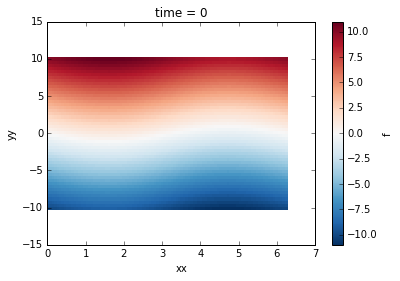

In [6]:
d2d.f[0].plot(x='xx', y='yy')

In [7]:
args = ['time', 'ny', 'nx']
d2d_stacked = xg.stack_var(d2d, 'f', 'yy', 'xx', False, False, *args)
d2d_stacked

<xarray.Dataset>
Dimensions:  (time: 1, yyxx: 5000)
Coordinates:
  * yyxx     (yyxx) object (-10.0, 0.0) (-10.0, 0.063466518254339258) ...
  * time     (time) int64 0
Data variables:
    f        (time, yyxx) float64 -10.0 -9.937 -9.873 -9.811 -9.749 -9.688 ...

In [28]:
print(d2d_stacked.f[0].values[:20])

[-10.          -9.93657608  -9.87340755  -9.81074876  -9.74885201
  -9.68796655  -9.62833754  -9.57020509  -9.51380326  -9.45935918
  -9.40709207  -9.35721239  -9.30992099  -9.26540829  -9.22385354
  -9.18542405  -9.15027457  -9.11854664  -9.090368    -9.06585214]


In [8]:
new_x = np.linspace(x.min(), x.max(), 20)
new_y = np.linspace(y.min(), y.max(), 20)
new_xx, new_yy = np.meshgrid(new_x, new_y)

In [9]:
args = ['yyxx', 'time', 'f', 'y', 'x']
d2d_regrid = xg.regrid_var(d2d_stacked, new_xx, new_yy, True, False, *args)

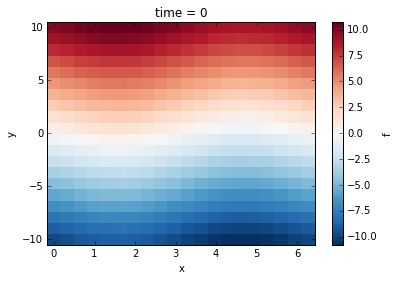

In [10]:
d2d_regrid.f[0].plot()

In [20]:
%time?

In [24]:
%lprun -f xg.regrid_var xg.regrid_var(d2d_stacked, new_xx, new_yy, True, True, *args)

In [25]:
%lprun -f xg.regrid_var xg.regrid_var(d2d_stacked, new_xx, new_yy, True, False, *args)